# 链家网成都二手房可视化分析

导入相应的模块

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from IPython.display import display
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline

In [3]:
lianjia_df = pd.read_csv(r'D:/Git/Repositories/lianjia/lianjia/spiders/cd_information.csv')

In [4]:
lianjia_df.head()

,District,Region,Elevator,Floor,Id,Layout,Price,Renovation,Size,Year
0,温江,西北,无,中楼层 (共7层),106104534427,3室2厅,61.7,精装,96.73㎡,未知年建
1,锦江,西北,有,低楼层 (共32层),106104215858,3室1厅,320.0,精装,72.19㎡,2009年建
2,都江堰,南,无,低楼层 (共6层),106105258569,3室1厅,64.0,简装,99.9㎡,未知年建
3,高新,东南,有,低楼层 (共17层),106102125501,1室1厅,78.0,精装,53.94㎡,2009年建
4,郫都,南,有,中楼层 (共31层),106105100234,2室1厅,75.0,精装,72.34㎡,2013年建


In [5]:
lianjia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
District      3000 non-null object
Region        3000 non-null object
Elevator      2995 non-null object
Floor         3000 non-null object
Id            3000 non-null int64
Layout        3000 non-null object
Price         3000 non-null float64
Renovation    2995 non-null object
Size          3000 non-null object
Year          3000 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 234.5+ KB


In [6]:
lianjia_df['Size']

0        96.73㎡
1        72.19㎡
2         99.9㎡
3        53.94㎡
4        72.34㎡
5        99.25㎡
6        80.89㎡
7        82.12㎡
8        84.58㎡
9        60.03㎡
10       80.29㎡
11       88.08㎡
12         138㎡
13      129.31㎡
14      109.48㎡
15       76.09㎡
16       86.17㎡
17       69.62㎡
18       96.88㎡
19      111.94㎡
20      147.99㎡
21      105.65㎡
22          54㎡
23          64㎡
24       76.12㎡
25       93.89㎡
26       84.08㎡
27       115.8㎡
28      133.17㎡
29       59.01㎡
         ...   
2970    137.02㎡
2971    105.03㎡
2972     85.92㎡
2973     93.03㎡
2974     49.95㎡
2975    105.97㎡
2976    232.34㎡
2977        77㎡
2978     88.49㎡
2979     60.56㎡
2980     75.94㎡
2981    102.39㎡
2982     67.71㎡
2983     89.68㎡
2984     66.61㎡
2985     88.27㎡
2986     89.19㎡
2987     75.92㎡
2988        89㎡
2989    120.16㎡
2990     49.41㎡
2991    118.12㎡
2992     88.29㎡
2993     91.13㎡
2994     70.99㎡
2995     47.32㎡
2996     67.25㎡
2997     68.19㎡
2998     49.37㎡
2999     86.56㎡
Name: Size, Length: 3000

In [7]:
lianjia_df['Year'] = lianjia_df['Year'].str.extract('(\d+)年建', expand=False)

In [8]:
lianjia_df['Size'] = lianjia_df.Size.apply(lambda x: eval(x.split('㎡')[0]))

In [9]:
lianjia_df

,District,Region,Elevator,Floor,Id,Layout,Price,Renovation,Size,Year
0,温江,西北,无,中楼层 (共7层),106104534427,3室2厅,61.7,精装,96.73,NaN
1,锦江,西北,有,低楼层 (共32层),106104215858,3室1厅,320.0,精装,72.19,2009
2,都江堰,南,无,低楼层 (共6层),106105258569,3室1厅,64.0,简装,99.90,NaN
3,高新,东南,有,低楼层 (共17层),106102125501,1室1厅,78.0,精装,53.94,2009
4,郫都,南,有,中楼层 (共31层),106105100234,2室1厅,75.0,精装,72.34,2013
5,龙泉驿,东南,有,中楼层 (共33层),106104986343,3室2厅,208.0,精装,99.25,2018
6,郫都,东,有,低楼层 (共24层),106105230277,3室1厅,72.0,精装,80.89,2016
7,成华,西北,有,高楼层 (共18层),106102876550,2室2厅,162.0,精装,82.12,2008
8,金牛,南,有,中楼层 (共20层),106104755240,2室1厅,106.0,精装,84.58,2009
9,青羊,北,有,中楼层 (共26层),106103041297,1室1厅,87.0,精装,60.03,2010


In [10]:
lianjia_df.describe()

,Id,Price,Size
count,3.000000e+03,3000.000000,3000.000000
mean,1.061046e+11,145.616077,90.293883
std,8.869834e+05,80.918694,29.593068
min,1.061008e+11,14.000000,17.790000
25%,1.061043e+11,97.000000,73.487500
50%,1.061049e+11,127.000000,86.560000
75%,1.061052e+11,170.000000,103.027500
max,1.061053e+11,848.000000,452.070000


In [11]:
df = lianjia_df.copy()
df['PerPrice'] = lianjia_df['Price']/lianjia_df['Size']

# 重新摆放列位置
columns = ['Region', 'District', 'Layout', 'Floor', 'Year', 'Size', 'Elevator', 'Renovation', 'PerPrice', 'Price']
df = pd.DataFrame(df, columns = columns)

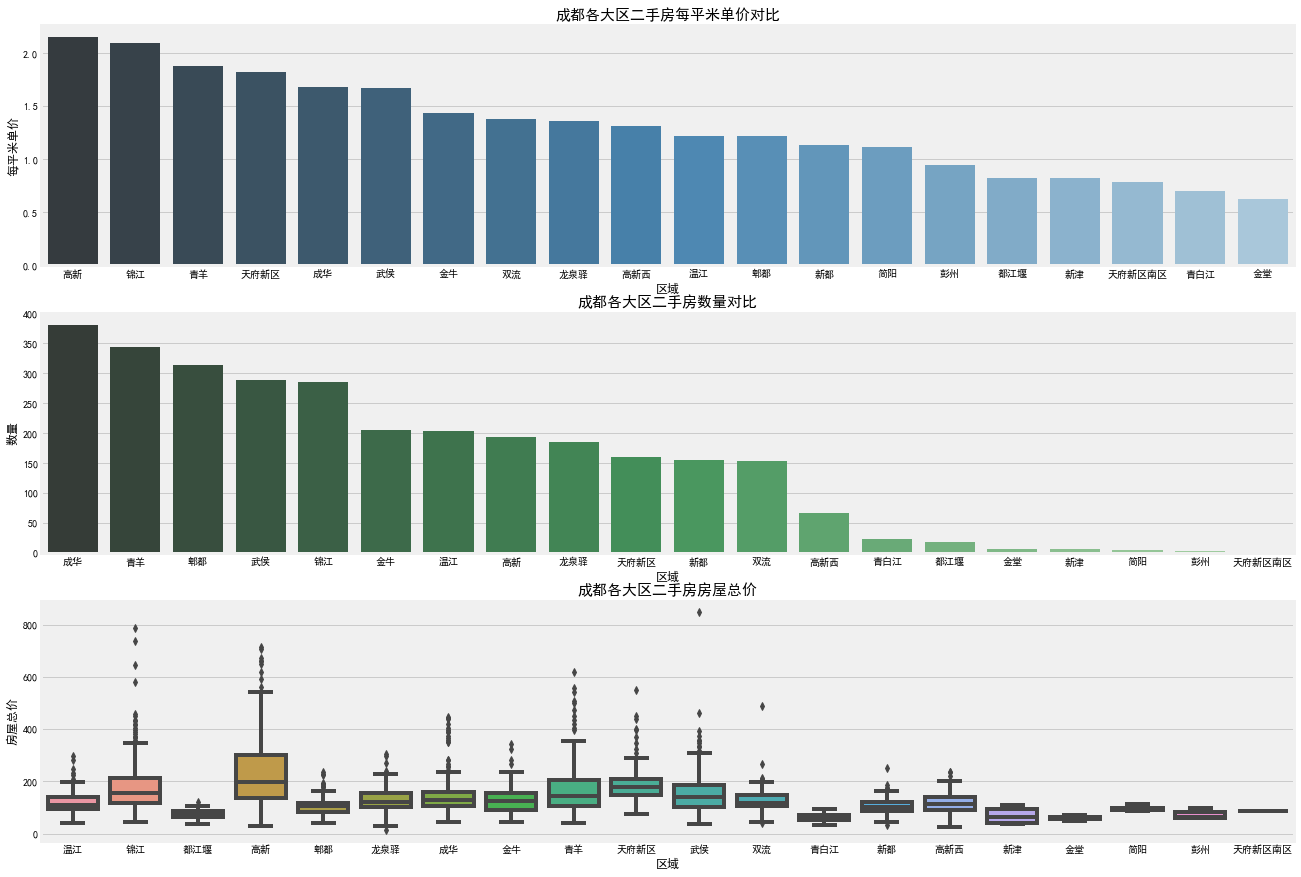

In [12]:
# 对二手房区域分组对比二手房数量和每平米房价
df_house_count = df.groupby('District')['Price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('District')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()

f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,15))
sns.barplot(x='District', y='PerPrice', palette="Blues_d", data=df_house_mean, ax=ax1)
ax1.set_title('成都各大区二手房每平米单价对比',fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.barplot(x='District', y='Price', palette="Greens_d", data=df_house_count, ax=ax2)
ax2.set_title('成都各大区二手房数量对比',fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='District', y='Price', data=df, ax=ax3)
ax3.set_title('成都各大区二手房房屋总价',fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')

plt.show()

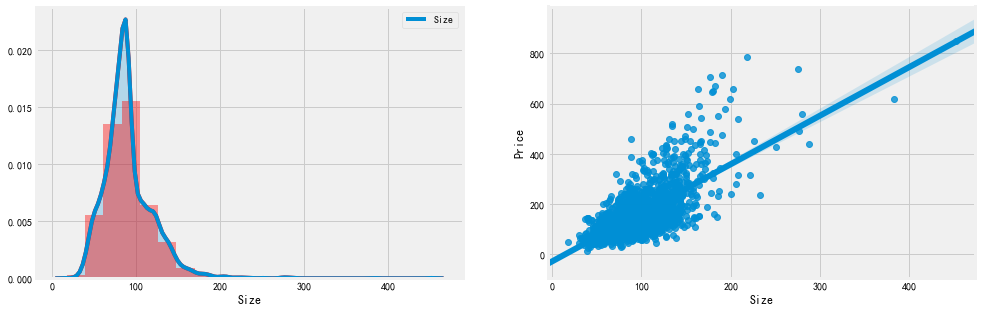

In [13]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
# 面积的分布情况
sns.distplot(df['Size'], bins=20, ax=ax1, color='r')
sns.kdeplot(df['Size'], shade=True, ax=ax1)
# 面积和出售价格的关系
sns.regplot(x='Size', y='Price', data=df, ax=ax2)
plt.show()

In [14]:
df.loc[df['Size']>200]

,Region,District,Layout,Floor,Year,Size,Elevator,Renovation,PerPrice,Price
354,南,高新,3室3厅,中楼层 (共44层),2011,280.00,有,毛坯,2.000000,560.0
379,西南,温江,2室3厅,低楼层 (共5层),2011,206.43,无,精装,1.356392,280.0
712,东南,高新,5室2厅,高楼层 (共45层),2017,207.91,有,精装,2.597278,540.0
718,东南,锦江,4室2厅,高楼层 (共41层),2015,275.00,有,精装,2.683636,738.0
753,西,锦江,3室2厅,中楼层 (共43层),2011,217.87,有,精装,3.603066,785.0
1035,东南,武侯,5室2厅,中楼层 (共29层),2000,221.87,有,简装,1.419750,315.0
1753,西北,天府新区,4室2厅,中楼层 (共31层),2015,206.00,有,毛坯,1.928641,397.3
1936,东南,高新,4室2厅,低楼层 (共32层),2008,250.80,有,精装,1.706539,428.0
2145,南,天府新区,5室2厅,中楼层 (共29层),2006,226.14,有,毛坯,1.989918,450.0
2319,南,武侯,4室2厅,高楼层 (共19层),2005,200.08,有,精装,1.199520,240.0


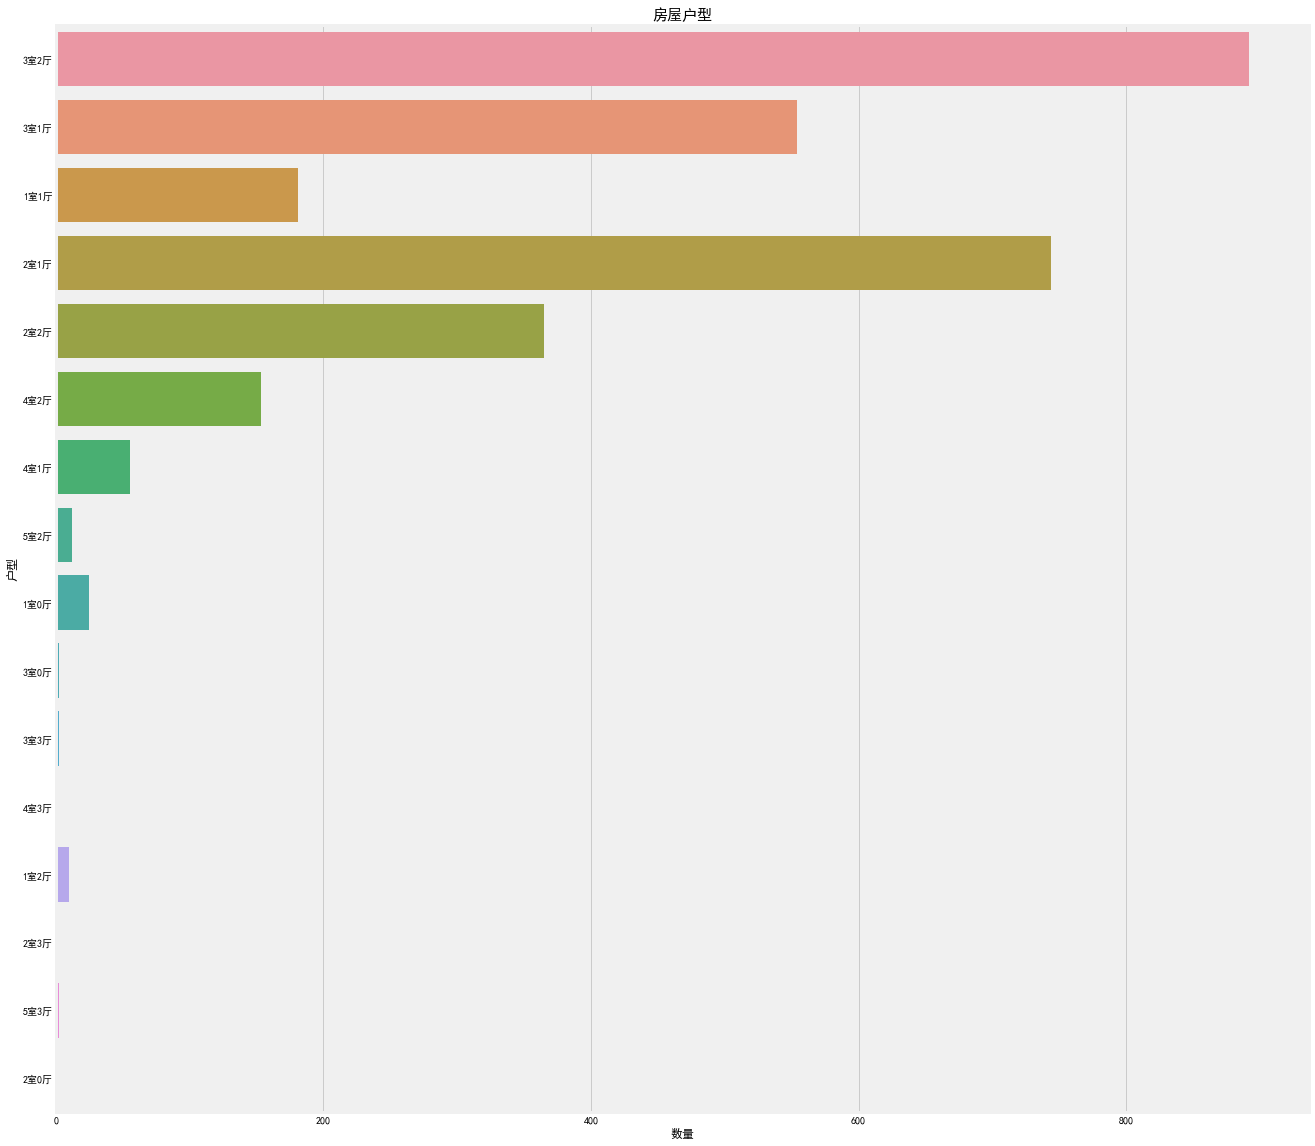

In [15]:
f, ax1= plt.subplots(figsize=(20,20))
sns.countplot(y='Layout', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

In [16]:
df['Renovation'].value_counts()

精装    1756
简装     890
毛坯     323
其他      26
Name: Renovation, dtype: int64

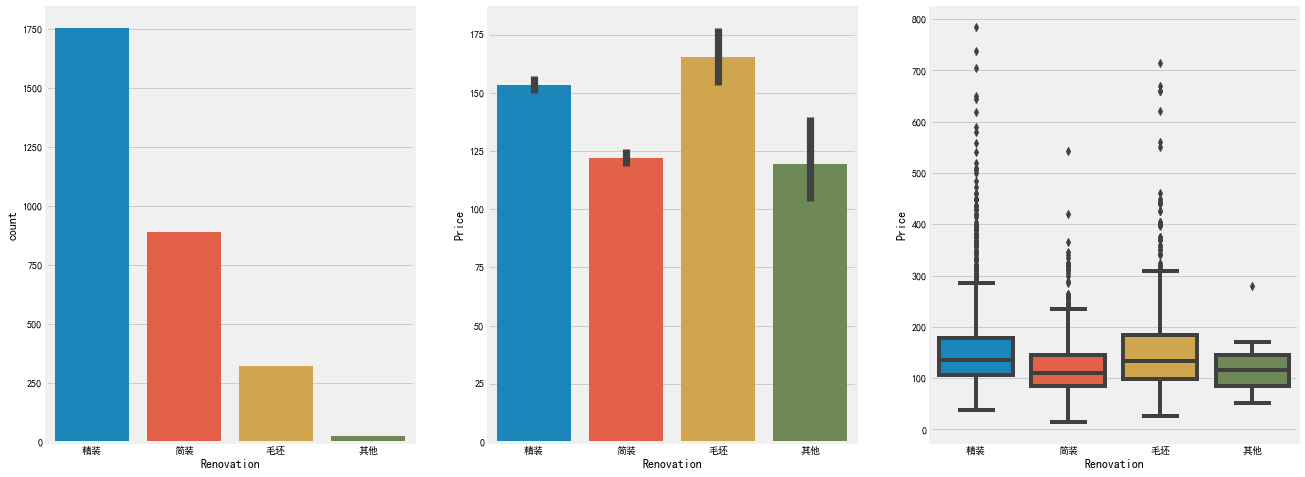

In [17]:
# 画幅设置
f, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(20, 8))
sns.countplot(df['Renovation'], ax=ax1)
sns.barplot(x='Renovation', y='Price', data=df, ax=ax2)
sns.boxplot(x='Renovation', y='Price', data=df, ax=ax3)
plt.show()

In [18]:
df['Elevator'].value_counts()

有       2495
无        455
暂无数据      45
Name: Elevator, dtype: int64

In [19]:
df['Floor'] = df['Floor'].str.extract('.*?共(\d+).*?', expand=False)

In [20]:
df.loc[(df['Floor']>str(6))&(df['Elevator']=='暂无数据'), 'Elevator'] = '有'
df.loc[(df['Floor']<=str(6))&(df['Elevator']=='暂无数据'), 'Elevator'] = '无'

In [21]:

df['Elevator'].value_counts()

有    2504
无     491
Name: Elevator, dtype: int64

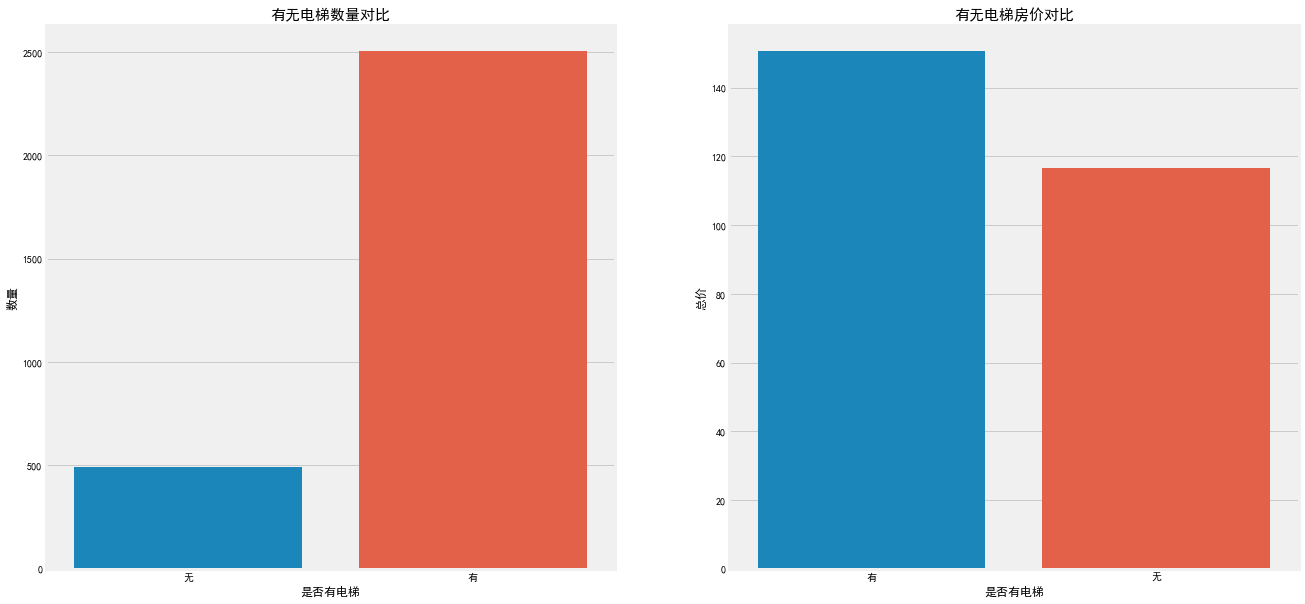

In [22]:

df_mean = df.groupby('Elevator')['Price'].mean().sort_values(ascending=False).to_frame().reset_index()

f, [ax1,ax2] = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(df['Elevator'], ax=ax1)
ax1.set_title('有无电梯数量对比',fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')
sns.barplot(x='Elevator', y='Price', data=df_mean, ax=ax2)
ax2.set_title('有无电梯房价对比',fontsize=15)
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('总价')
plt.show()

In [23]:
df = df[~df['Year'].isnull()]

In [24]:
df['Year'] = df.Year.apply(lambda x: int(x))

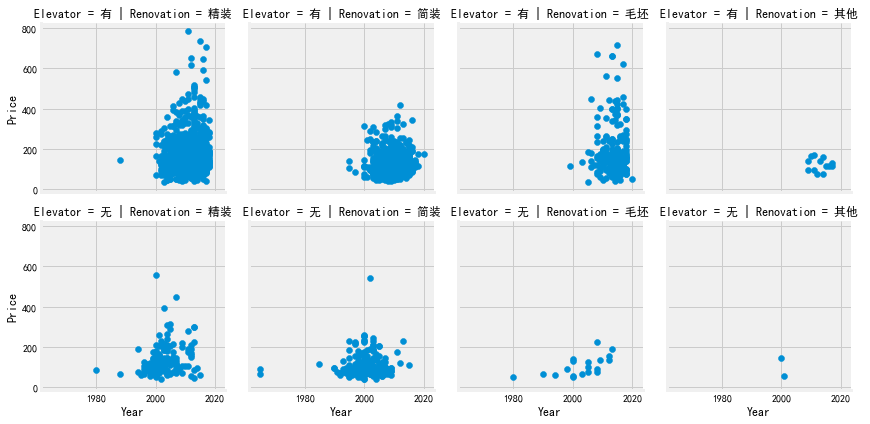

In [25]:

grid = sns.FacetGrid(df, row='Elevator', col='Renovation', palette='seismic')
grid.map(plt.scatter, 'Year', 'Price')
grid.add_legend()

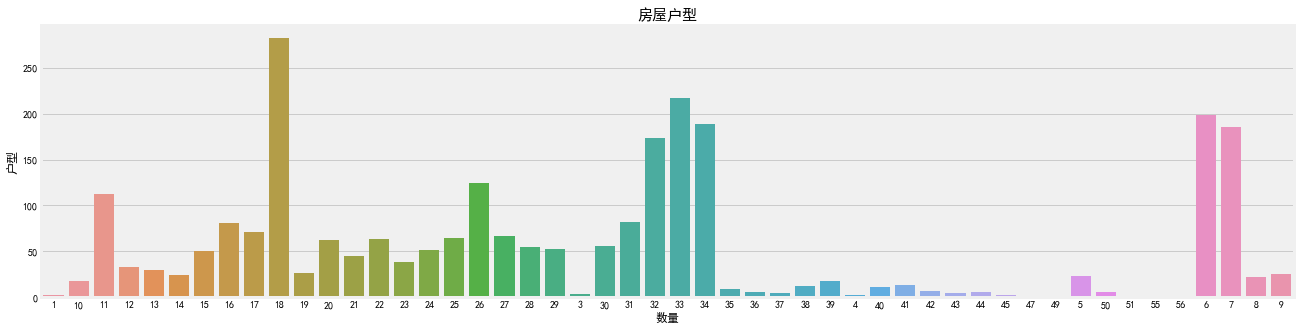

In [26]:
f, ax1= plt.subplots(figsize=(20,5))
sns.countplot(x='Floor', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

In [27]:
df['Floor'] = df.Floor.apply(lambda x: int(x))

In [28]:
df

,Region,District,Layout,Floor,Year,Size,Elevator,Renovation,PerPrice,Price
1,西北,锦江,3室1厅,32,2009,72.19,有,精装,4.432747,320.0
3,东南,高新,1室1厅,17,2009,53.94,有,精装,1.446051,78.0
4,南,郫都,2室1厅,31,2013,72.34,有,精装,1.036771,75.0
5,东南,龙泉驿,3室2厅,33,2018,99.25,有,精装,2.095718,208.0
6,东,郫都,3室1厅,24,2016,80.89,有,精装,0.890098,72.0
7,西北,成华,2室2厅,18,2008,82.12,有,精装,1.972723,162.0
8,南,金牛,2室1厅,20,2009,84.58,有,精装,1.253251,106.0
9,北,青羊,1室1厅,26,2010,60.03,有,精装,1.449275,87.0
10,东南,青羊,3室1厅,7,2000,80.29,无,简装,1.058662,85.0
11,南,天府新区,3室2厅,26,2010,88.08,有,简装,1.805177,159.0


In [29]:
df[['Layout_room','Layout_hall']] = df['Layout'].str.extract('(\d)室(\d)厅').astype('int64')

In [30]:
df['Year'] = pd.qcut(df['Year'],8).astype('object')

In [31]:
df

,Region,District,Layout,Floor,Year,Size,Elevator,Renovation,PerPrice,Price,Layout_room,Layout_hall
1,西北,锦江,3室1厅,32,"(2008.0, 2009.0]",72.19,有,精装,4.432747,320.0,3,1
3,东南,高新,1室1厅,17,"(2008.0, 2009.0]",53.94,有,精装,1.446051,78.0,1,1
4,南,郫都,2室1厅,31,"(2011.0, 2013.0]",72.34,有,精装,1.036771,75.0,2,1
5,东南,龙泉驿,3室2厅,33,"(2015.0, 2020.0]",99.25,有,精装,2.095718,208.0,3,2
6,东,郫都,3室1厅,24,"(2015.0, 2020.0]",80.89,有,精装,0.890098,72.0,3,1
7,西北,成华,2室2厅,18,"(2003.0, 2008.0]",82.12,有,精装,1.972723,162.0,2,2
8,南,金牛,2室1厅,20,"(2008.0, 2009.0]",84.58,有,精装,1.253251,106.0,2,1
9,北,青羊,1室1厅,26,"(2009.0, 2011.0]",60.03,有,精装,1.449275,87.0,1,1
10,东南,青羊,3室1厅,7,"(1964.999, 2003.0]",80.29,无,简装,1.058662,85.0,3,1
11,南,天府新区,3室2厅,26,"(2009.0, 2011.0]",88.08,有,简装,1.805177,159.0,3,2


In [32]:
df['Region'].value_counts()

东南          661
南           524
东           261
西南          254
西北          188
西           174
东北          155
北           150
南 北         109
东 西          23
东南 南         16
东南 西北        14
西南 东北        13
东 东南         12
东南 西南        10
东 南          10
南 西南          7
西南 西          6
北 南           5
东 东北          5
西 西北          5
东南 东北         3
东南 东          3
南 东           3
西南 南          3
东 东南 南        2
东南 北          2
南 东北          2
东 北           2
西北 东南         1
东 南 西南        1
东北 东南         1
东 南 西 北       1
西 北           1
南 西北          1
西南 西北         1
东南 南 北        1
东 西 北 南       1
南 西           1
西南 东南         1
东南 南 西南       1
东 西南          1
南 西南 西        1
北 东北          1
东 东南 西南       1
东南 西南 西北      1
东北 东南 西南      1
Name: Region, dtype: int64

In [33]:
# 根据已有特征创建新特征
df['Layout_total'] = df['Layout_room'] + df['Layout_hall']
df['Size_room_ratio'] = df['Size']/df['Layout_total']

# 删除无用特征
df = df.drop(['Layout','Year'],axis=1)

In [34]:
df

,Region,District,Floor,Size,Elevator,Renovation,PerPrice,Price,Layout_room,Layout_hall,Layout_total,Size_room_ratio
1,西北,锦江,32,72.19,有,精装,4.432747,320.0,3,1,4,18.047500
3,东南,高新,17,53.94,有,精装,1.446051,78.0,1,1,2,26.970000
4,南,郫都,31,72.34,有,精装,1.036771,75.0,2,1,3,24.113333
5,东南,龙泉驿,33,99.25,有,精装,2.095718,208.0,3,2,5,19.850000
6,东,郫都,24,80.89,有,精装,0.890098,72.0,3,1,4,20.222500
7,西北,成华,18,82.12,有,精装,1.972723,162.0,2,2,4,20.530000
8,南,金牛,20,84.58,有,精装,1.253251,106.0,2,1,3,28.193333
9,北,青羊,26,60.03,有,精装,1.449275,87.0,1,1,2,30.015000
10,东南,青羊,7,80.29,无,简装,1.058662,85.0,3,1,4,20.072500
11,南,天府新区,26,88.08,有,简装,1.805177,159.0,3,2,5,17.616000


# 建模阶段

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [36]:
df['Renovation1'] = df['Renovation'].map({'精装': 3, '简装': 2, '毛坯': 1, '其他': 0})

# 将不同的朝向分别单独出来一列
df['dong'] = df['Region'].apply(lambda x: '东'in x).map({True: 1, False: 0})
df['nan'] = df['Region'].apply(lambda x: '南'in x).map({True: 1, False: 0})
df['xi'] = df['Region'].apply(lambda x: '西'in x).map({True: 1, False: 0})
df['bei'] = df['Region'].apply(lambda x: '北'in x).map({True: 1, False: 0})

In [37]:
df.head()

,Region,District,Floor,Size,Elevator,Renovation,PerPrice,Price,Layout_room,Layout_hall,Layout_total,Size_room_ratio,Renovation1,dong,nan,xi,bei
1,西北,锦江,32,72.19,有,精装,4.432747,320.0,3,1,4,18.047500,3.0,0,0,1,1
3,东南,高新,17,53.94,有,精装,1.446051,78.0,1,1,2,26.970000,3.0,1,1,0,0
4,南,郫都,31,72.34,有,精装,1.036771,75.0,2,1,3,24.113333,3.0,0,1,0,0
5,东南,龙泉驿,33,99.25,有,精装,2.095718,208.0,3,2,5,19.850000,3.0,1,1,0,0
6,东,郫都,24,80.89,有,精装,0.890098,72.0,3,1,4,20.222500,3.0,1,0,0,0


In [38]:
df['Elevator1'] = df['Elevator'].map({'有': 1, '无': 0})

In [39]:
df = df.drop(['District', 'Floor', 'Region', 'Renovation', 'Elevator','PerPrice','Layout_total','Size_room_ratio'], axis=1)

In [40]:
df.head()

,Size,Price,Layout_room,Layout_hall,Renovation1,dong,nan,xi,bei,Elevator1
1,72.19,320.0,3,1,3.0,0,0,1,1,1.0
3,53.94,78.0,1,1,3.0,1,1,0,0,1.0
4,72.34,75.0,2,1,3.0,0,1,0,0,1.0
5,99.25,208.0,3,2,3.0,1,1,0,0,1.0
6,80.89,72.0,3,1,3.0,1,0,0,0,1.0


In [41]:
df.dropna(inplace=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], 
                                                    test_size=0.4, random_state=100)


In [43]:
lr = LinearRegression()
# 使用训练数据进行参数估计
model = lr.fit(X_train, y_train)
# print(lr.intercept_)#截距
lr_y_predict = lr.predict(X_test)
score = r2_score(y_test, lr_y_predict)
print("模型的拟合优度是：", score)

模型的拟合优度是： 0.6731319662614326


In [44]:
raw = df.drop(['Price'], axis=1)
raw.head()

,Size,Layout_room,Layout_hall,Renovation1,dong,nan,xi,bei,Elevator1
1,72.19,3,1,3.0,0,0,1,1,1.0
3,53.94,1,1,3.0,1,1,0,0,1.0
4,72.34,2,1,3.0,0,1,0,0,1.0
5,99.25,3,2,3.0,1,1,0,0,1.0
6,80.89,3,1,3.0,1,0,0,0,1.0


In [45]:
'''
预测房屋类型为：
1.房屋大小为99㎡左右
2.类型为三室一厅
3.房屋朝向为西北
4.具有电梯
5.房屋精装修
'''

x_new = raw.head(1).copy()
x_new['Size'] = 99
x_new['Layout_room'] = 3
x_new['Layout_hall'] = 1
x_new['Renovation1'] = 3.0
x_new['dong'] = 0
x_new['nan'] = 0
x_new['xi'] = 1
x_new['bei'] = 1
x_new['Elevator1'] = 1
y_predict = lr.predict(x_new)
print("该房屋预测的价格是：%.2f" % float(y_predict), "万元")

该房屋预测的价格是：83.08 万元
